# Lineáris regresszió

## 1 Lineáris regresszió 1 változóval

Ebben a példában egy ételszállító cég adatain dolgozunk. 
Célunk, hogy előrejelezzük, mekkora lesz a cég profitja, ha egy adott méretű városban
elindítja a szolgáltatását.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# adatok betöltése és ábrázolása
data = pd.read_csv("./data/simpleml/ex1data1.txt", names = ["Population", "Profit"])

Text(0,0.5,'Profit')

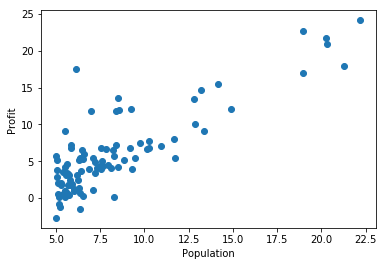

In [49]:
plt.scatter(x=data["Population"], y=data["Profit"])
plt.xlabel("Population")
plt.ylabel("Profit")

Ebben a példában a megfigyeléseink két részből állnak:

* Magyarázóváltozó (feature): $x$ (most a Population). Ez alapján szeretnénk előrejelezni.
* Célváltozó: $y$ (most a Profit). Ezt szeretnénk előrejelezni.

A megfigyeléseink száma $n$, az $i$. megfigyelés feature-eit $x^{(i)}$, a célváltozóját $y^{(i)}$ jelöli. Általános esetben minden egyes megfigyelés több, $n$ feature-t is tartalmazhat, így szerencsésebb a feature-öket indexelni: az $x^{(i)}_j$ az $i$. megfigyelés $j$. feature-e. Sőt, bevezetünk egy extra feature-t is, aminek konstans 1 az értéke, ez lesz a 0-ás számú (hamarosan látni fogjuk, hogy ez milyen jó ötlet): $x_0^{(i)}=1$. A továbbiakban a feature-ökből álló vektort értjük az index nélküli jelölés alatt: $x^{(i)}=[x^{(i)}_0,x^{(i)}_1,\dots,x^{(i)}_n]^T$. Ebben a példában $n=1$, így $x^{(i)}$ egy 2 elemű vektor lesz: a konstans 1, valamint a Population.

A lineáris regresszió lényege, hogy a célváltozót a magyarázó váltózók lineáris függvényével közelíti. Ha a becsült célváltozót $\hat{y}^{(i)}$-vel jelöljük, akkor ezt az alábbi alakban kapjuk meg:

$$ \hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}_1.$$

Ez egy (lineáris) modell. Két paramétere van, $\theta_0$ és $\theta_1$, melyeket az egyszerűség kedvéért vektorba szoktak gyűjteni: $\theta=[\theta_0,\theta_1]^T$, így a célváltozó becslése vektorok segítségével még tömörebben kifejezhető:
$$ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$$
(Milyen jól jött a 0-ás feature bevezetése!) A gépi tanulás célja az $m$ megfigyelés alapján az optimális modell paraméterek, azaz $\theta_0$ és $\theta_1$ meghatározása. 

Hogy mit is jelent az, hogy *optimális*? Ezt egy ún. **loss function** (költségfüggvény) határozza meg, amit $J(\theta)$ jelöl, és pont azt írja le, hogy mennyire rossz a becslés ($\theta$ paraméterek mellett mekkora a veszteség). Lineáris regressziónál az átlagos négyzetes hibát (mean squared error, MSE) szokták alkalmazni, aminek az alakja:

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}_1 - y^{(i)})^2$$

Miért szerencsés a négyzetre emelés? Mert így mindkét irányű hibát (alá- és fölélövést) is büntetni tudjuk. Használhatnánk négyzetreemelés helyett abszolút értéket is, de a négyzet matematikailag könnyebben kezelhető, mert minden pontban létezik a deriváltja.

### 1.1 Az optimális paraméterek meghatározása a loss function analitikus megoldásával

Jelen esetben a költségfüggvény annyira egyszerű, hogy matematikailag pontosan is meg határozni a minimumát. Ehhez a $J(\theta)$ függvényt deriválni kell $\theta$ szerint (vigyázat, vektorváltozó!), és ahol a derivált $0$, ott kapjuk az optimumot (na jó, kellene vizsgálni a második deriváltat is, de attól most eltekintünk).

Láttuk, hogy az $x^{(i)}$ feature-ök alapján a becslés $ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$. Ha az összes megfigyelésre felírjuk ezt az egyenletet, és egymás alá rendezzük őket, akkor megkapjuk, hogy 
$$ \hat{y} = X \theta, $$
ahol $\hat{y}$ az összes célváltozót tartalmazó $m\times 1$-es vektor, és $X$ az összes magyarázó változót tartalmazó $m\times (n+1)$-es mátrix. A loss függvény ezzel a jelöléssel:
$$ J(\theta) = \frac{1}{m}(y - X \theta)^T(y - X \theta),$$
melynek a $\theta$ szerinti deriváltja (nem triviális!):
$$ \frac{d}{d\theta} J(\theta) = \frac{2}{m}(X^T X \theta - X^T y).$$

Ennek a $0$ helyét egyszerű mátrix műveletekkel megkaphatjuk:
$$ \theta_{opt}=(X^T X)^{-1}X^T y.$$
Ezt nevezzük a *normál egyenletnek*.

Oldjuk meg ezt a példánkra!

In [213]:
import numpy as np
# konstans 1 oszlop, és a population oszlop alkotja az X mátrixot
X = np.hstack((np.ones((len(data),1)), np.matrix(data["Population"].values).T))
# a profit oszlop lesz az y vektor
y = np.matrix(data["Profit"].values).T
# optimális súlyok kiszámítása a normál egyenlettel
theta = (X.T*X).I.dot(X.T).dot(y)
theta

matrix([[-3.89578088],
        [ 1.19303364]])

Az optimális $\theta$ paraméterek ismeretében az előrejelzést megkaphatjuk az $X\theta$ mátrix szorzás segítségével.

Rajzoljuk ki az adatokat és a modellt is:

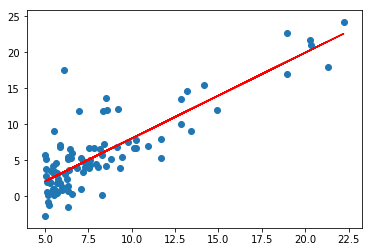

In [214]:
plt.plot(data["Population"], X.dot(theta), c="r", label='Modell')
plt.scatter(data["Population"], data["Profit"], label='Valóság')

A loss (átlagos négyzetes hiba, $J(\theta)$) kiszámítása: 

In [52]:
mse = (1.0/len(data))*np.sum(np.power(y - X.dot(theta), 2))
mse

8.953942751950358

### 1.2 Az optimális paraméterek meghatározása numerikus optimalizálással

A gépi tanulás gyakorlatában a normál egyenletet nem használjuk. Egyrészt mert általában nem lineáris modellekkel dolgozunk, másrészt pedig mert $X$ jellemzően nagyon nagy, és nem szeretnénk hatalmas méretű mátrixokat szorozgatni/invertálni. A normál egyenlet helyett numerikus optimalizálást alkalmazunk. Ez egy iteratív eljárás, ami kezdetben egy véletlen tippel állítja elő $\theta$-t, majd iteratív módon javítgatja azt, amíg tudja. A gépi tanulásban messze a legelterjedtebb numerikus módszer a GD (gradient descent), és ennek változatai. Még a legbonyolúltabb deep learning rendszerekben is ezt használják, úgyhogy érdemes a lineáris regresszión keresztül megismerkedni vele.

A GD egy mohó algoritmus, nincs túl sok esze. A célja, hogy megtalálja a loss function minimumát. A loss function-t egy több dimenziós dombságként képzelhetjül el, esetünkben 3D-s, mivel minden $\theta_0$ és $\theta_1$ értékhez tartozik egy loss, $J(\theta)$:

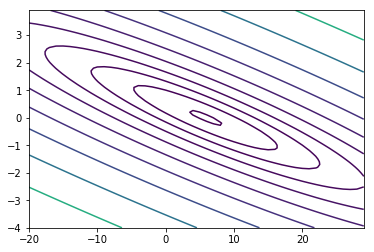

In [121]:
from mpl_toolkits.mplot3d import Axes3D
A = np.arange(-20, 30, 1)
B = np.arange(-4, 4, 0.1)
J = np.array([[(1.0/len(data))*np.sum(np.power(y-X.dot(np.array([A[i],B[j]])), 2)) for i in range(len(A))] for j in range(len(B))])

plt.contour(A, B, J, np.logspace(1,7,30))

Ezen a felületen a GD mindig arra lép tovább, amerre a legmélyebb pontot sejti. Ehhez mindig kiszámítja a grádienst (ez ugye a hegytető felé mutat), 
és az ellenkező irányba mozdul, mégpedig annyit, amennyit a *learning rate* ($\alpha$) paraméter előír neki. Ha $\alpha$ túl kicsi, kicsiket lép, 
és lassan ér le a mélybe. Ha $\alpha$ túl nagy, fennáll a veszély, hogy átlépi az optimumot. Ez egy hiperparaméter, jól kell belőni az értékét.

Próbáljuk ki! A grádiens, azaz $\frac{d}{d\theta}J(\theta)$ fent megtalálható.


In [24]:
theta = np.random.randn(2,1)
alpha = 0.01
numiter = 1
while True:
    thetav = theta - alpha * X.T.dot(X.dot(theta)-y) / (2*len(data))
    # leállási feltétel
    if np.sum(abs(thetav - theta)) < 1e-5:
        print("Vége.")
        break    
    # státusz üzenetek minden 100. lépésben
    if numiter % 500 == 0:
        mse = (1.0/len(data))*np.sum(np.power(y - X.dot(theta), 2))
        print("{0}. iteráció, hiba: {1}".format(numiter, mse))
    
    numiter += 1
    theta = thetav
theta

500. iteráció, hiba: 10.556276001064909
1000. iteráció, hiba: 9.6042934825043
1500. iteráció, hiba: 9.217905365823455
2000. iteráció, hiba: 9.061079191181186
2500. iteráció, hiba: 8.997427003157915
3000. iteráció, hiba: 8.97159202344619
3500. iteráció, hiba: 8.961106191027344
4000. iteráció, hiba: 8.956850229430193
4500. iteráció, hiba: 8.955122831128097
5000. iteráció, hiba: 8.954421719328574
5500. iteráció, hiba: 8.954137153947887
6000. iteráció, hiba: 8.9540216553128
6500. iteráció, hiba: 8.953974777035924
Vége.


matrix([[-3.88570748],
        [ 1.19202166]])

... pont ugyanazokat a paramétereket kaptuk, melyeket a normál egyenlet alapján kaptunk. Mivel a költségfüggvény konvex, a GD (megfelelő $\alpha$ paraméterrel) garantáltan megtalálja az optimumot.


### 1.3 Az sklearn csomag

Szerencsére a python-ban a gépi tanulásra is van library: ez az sklearn. Most oldjuk meg ugyanezt a feladatot az sklearn segítségével.

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [168]:
X = np.matrix(data["Population"].values).T
reg = LinearRegression().fit(X, data["Profit"])

... ez könnyen ment. Az sklearn külön adja vissza a feature-ök szorzóit (coef_), és a konstams eltolást (reg.intercept_), ettől eltekintve ugyanazt kaptuk, mint eddig:

In [169]:
print(reg.intercept_)
print(reg.coef_)

-3.89578087831185
[1.19303364]


In [170]:
# ez a modell predikciója:
ypred = reg.predict(X)
# lássuk, mekkora a hiba a valósághoz képest:
mse = mean_squared_error(y, ypred)
mse

8.953942751950358

... ami pont az, amit fentebb számoltunk, manuálisan.

## 2 Lineársi regresszió új feature-ök bevezetésével

A lineáris regresszió szép és egyszerű, de sajnos a valóságban ritka a lineáris függés a változók között. Ekkor a lineáris regresszió csak relatíve nagy hibával tudja modellezni a valóságot. 

Szerencsére nincs minden veszve, ugyanis egy egyszerű trükk segítségével a lineáris regresszióból is ki tudunk csikarni nemlineáris viselkezdés. A titok nyitja új, mesterséges feature-ök bevezetése. Eddig az $x^{(i)}_1$ volt az $i$. megfigyelésünk, melyből $y^{(i)}$-t becsültük. Ha $x^{(i)}_1$ mellett bevezetjük az $x^{(i)}_2=(x^{(i)}_1)^2, x^{(i)}_3=(x^{(i)}_1)^3, \dots$ változókat, vagy akár ennél cifrábbakat is (pl. $sin(x^{(i)}_1)$, stb.), akkor a lineáris regresszió ezek súlyozásával fogja közelíteni $y^{(i)}$-t. Ez természetesen növeli a dimenzionalitást, több súlyunk lesz.

Az alábbi példán szépen látszik, hogy több polinomiális tag hozzáadásával csökken az MSE, és a grafikonokon is jól követhető a javulás.

In [235]:
X = np.hstack((np.matrix(data["Population"].values).T, 
               np.power(np.matrix(data["Population"].values).T,2), 
               np.power(np.matrix(data["Population"].values).T,3), 
               np.power(np.matrix(data["Population"].values).T,4)))
reg = LinearRegression().fit(X, data["Profit"])
# ez a modell predikciója:
ypred = reg.predict(X)
# lássuk, mekkora a hiba a valósághoz képest:
mse = mean_squared_error(y, ypred)
mse

8.830450395108368

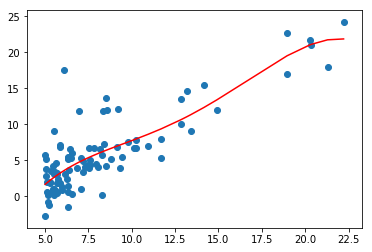

In [236]:
ix = np.argsort(data["Population"])
plt.plot(data["Population"].sort_values(), ypred[ix], c="r", label='Modell')
plt.scatter(data["Population"], y.A, label='Megfigyelések')

Sajnos az élet nem fenékig tejfel. Ha túlzásba visszük az új feature-ök hozzáadását abban a reményben, 
hogy majd úgyis kinullázódik a súlya minden szükségtelen tagnak, akkor csalódni fogunk. A sok új feature egy részét ugyanis a modell nem kinullázni fogja,
hanem elkezni kihegyezni őket a legrosszabbul illeszkedő minták jobb közelítésére. Ennek akár örülhetnénk is, de valójában ez nem jó dolog,
ugyanis a modell általánosító képességét rontja, ha pár extrém tanulóminta elkapására pazarolja a képességeit egy jobb, általánosabban
használható görbe előállítása helyett. Ez a *túltanulás* jelensége. Lássunk egy példát túltanulásra, a fenti példában alkalmazott trükk túlzásba vitelével.

In [231]:
X = np.hstack((np.matrix(data["Population"].values).T, 
               np.power(np.matrix(data["Population"].values).T,2), 
               np.power(np.matrix(data["Population"].values).T,3), 
               np.power(np.matrix(data["Population"].values).T,4), 
               np.power(np.matrix(data["Population"].values).T,5), 
               np.power(np.matrix(data["Population"].values).T,6), 
               np.power(np.matrix(data["Population"].values).T,7), 
               np.power(np.matrix(data["Population"].values).T,8), 
               np.power(np.matrix(data["Population"].values).T,9), 
               np.power(np.matrix(data["Population"].values).T,10), 
               np.power(np.matrix(data["Population"].values).T,0.5), 
               np.power(np.matrix(data["Population"].values).T,0.25)))
reg = LinearRegression().fit(X, data["Profit"])
# ez a modell predikciója:
ypred = reg.predict(X)
# lássuk, mekkora a hiba a valósághoz képest:
mse = mean_squared_error(y, ypred)
mse

8.475513387825371

Eddig jó, az MSE szép alacsony érték! De nézzünk csak rá a grafikonra, mint kaptunk:

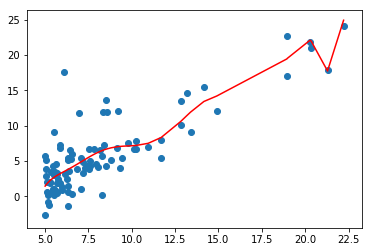

In [232]:
ix = np.argsort(data["Population"])
plt.plot(data["Population"].sort_values(), ypred[ix], c="r", label='Modell')
plt.scatter(data["Population"], y.A, label='Megfigyelések')

## 3 Lineáris regresszió több változóval

Ehhez a példához egy új adatsort használunk, melynek 3 oszlopa van. Minden megfigyelés egy ingatlan eladás paramétereit tartalmazza. Az első oszlop a ház méretét (négyzetméterben), a második a hálószobák számát, a harmadik pedig az eladási árat (dollárban). Célunk, hogy az irodánkba érkező ügyfél házát a lehető legpontosabban be tudjuk árazni.

In [249]:
data = pd.read_csv("./data/simpleml/ex1data2.txt", names = ["Size", "Bedrooms", "Price"])
data[0:10]

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Mivel itt már megfigyelésenként két feature van (a méret és a hálószobák száma), és ezek különböző nagyságrendben mozognak (méret: 1000-3000, hálószobaszám: 2-4) nem hagyhatunk ki egy nagyon fontos lépést: a *skálázást*. Ez - többek között - a GD algoritmuson is segít (amikor a loss függvény által adott felületen lépeget), hiszen minden irányban kb. azonos a "lépésméret", ha $\alpha$-nyit lépünk, az minden feature mentén kb. azonos mértékű elmozdulást eredményez.

A skálázás nagyon egyszerű: minden oszlopból ki kell vonni az átlagát, és le kell osztani a szórásáva. Végeredményképp minden oszlopunk 0 átlagú és 1 szórású lesz. Szerencsére ezt a lépést is támogatja az sklearn.

In [267]:
from sklearn.preprocessing import scale
X = data[["Size","Bedrooms"]].values
y = data["Price"].values
X = scale(X)
X[0:10,]

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337]])

In [273]:
reg = LinearRegression().fit(X, y)
# ez a modell predikciója:
ypred = reg.predict(X)
# lássuk, mekkora a hiba a valósághoz képest:
mse = mean_squared_error(y, ypred)
mse

4086560101.2056565

Nézzük meg a $\theta$ paramétereket:

In [275]:
print(reg.intercept_)
print(reg.coef_)

340412.6595744681
[109447.79646964  -6578.35485416]


Az MSE hatalmasnak tűnik, de ne felejtsük, hogy ez négyzetes hiba, és a célváltozó nagyságrendje is elég nagy. Számítsuk ki az abszolút relatív hibát, és ábrázoljuk (rendezve) egy grafikonon:

[0.10906949 0.13270406 0.07720724 0.16053528 0.12524939 0.10363128
 0.12056835 0.31677789 0.20516312 0.11902928 0.35298289 0.0149706
 0.01062723 0.04373023 0.07694118 0.16685845 0.14678239 0.17783014
 0.16430369 0.20435161 0.22328633 0.31353578 0.18022961 0.26116651
 0.05403968 0.13359106 0.42658124 0.1150746  0.22179508 0.43541981
 0.06221692 0.29529467 0.07537507 0.13763108 0.07294986 0.05414002
 0.02594988 0.01867533 0.1683403  0.23909167 0.17566233 0.13651816
 0.31210074 0.22930883 0.06019658 0.04189397 0.03609899]


Text(0,0.5,'Relaív hiba')

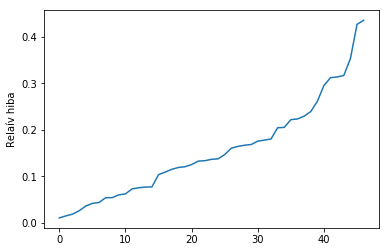

In [282]:
rmae = np.abs(ypred-y)/y
print(rmae)
plt.plot(np.sort(rmae))
plt.ylabel("Relaív hiba")

Mesterséges feature-öket természetesen most is hozzáadhatunk, mindkét oszlop hatványait, vagy akár a két oszlop szorzatát is, de a túltanulás veszélye fennáll.

In [295]:
Xv = np.hstack((X, np.power(X[:,0:1],2), np.power(X[:,1:2],2),
               np.power(X[:,0:1],3), np.power(X[:,1:2],3),
                X[:,0:1]*X[:,1:2]))            
reg = LinearRegression().fit(Xv, y)
# ez a modell predikciója:
ypred = reg.predict(Xv)
# lássuk, mekkora a hiba a valósághoz képest:
mse = mean_squared_error(y, ypred)
mse

3539341657.927014